___
# Atividade: Modelos probabilísticos contínuos e Dados
___

## Aula 16

<div id="indice"></div>

## Índice

- [Teoria: Distribuição Normal em Python](#teoria)
- [Problema: Concentração de poluente em um tanque de combustível](#problema)
    - [Modelo teórico](#modelo-teorico)
        - [Exercício 1](#ex1)
        - [Exercício 2](#ex2)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
    - [Resultados empíricos](#resultados-empiricos)
        - [Exercício 5](#ex5)
        - [Exercício 6](#ex6)
    - [Comparação: resultados empíricos *vs* modelo teórico](#comparacao)
        - [Exercício 7](#ex7)
        - [Exercício 8](#ex8)
        - [Exercício 9](#ex9)
        - [Exercício 10](#ex10)
- [Normal Padrão](#z)        
     - [Exercício 11](#ex11)
- [Lista de comandos utilizados neste notebook](#comandos)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

___

<div id="teoria"></div>

## Teoria: Distribuição Normal em Python

![Caixa de galton](LegalTameChanticleer-size_restricted.gif)

[Fonte: https://www.youtube.com/watch?v=UCmPmkHqHXk](https://www.youtube.com/watch?v=UCmPmkHqHXk&t=271s)

A biblioteca SciPy está cheia de funções para nos ajudar a trabalhar com variáveis aleatórias! https://en.wikipedia.org/wiki/SciPy

Algumas funções úteis para desenvolver seu código considerando a distribuição Normal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Lembrando que vamos assumir que $X\sim N(\mu, \sigma^2)$.

Logo, faça `from scipy import stats`, então:

* $f(x)$: `stats.norm.pdf(x, loc=mu, scale=sigma)`

* $P(X\leq x)$: `stats.norm.cdf(x, loc=mu, scale=sigma)`

* $x$ tal que $q=P(X\leq x)$: `stats.norm.ppf(q, loc=mu, scale=sigma)`

* $E(X)$: `stats.norm.mean(loc=mu, scale=sigma)`

* $Var(X)$: `stats.norm.var(loc=mu, scale=sigma)`

* $DP(X)$: `stats.norm.std(loc=mu, scale=sigma)`

___

<div id="problema"></div>

# Problema: Concentração de poluente em um tanque de combustível

A concentração (em $\mu g/L$) de um determinado poluente em um tanque de combustível é modelada como uma normal com média 500 e variância 645.

Nesse caso, vamos assumir que a variável aleatória contínua é dada por:

- $X$: concentração do poluente em um tanque de combustível, em $\mu g/L$.

Pelo modelo teórico, temos: $X\sim N(500, 645).$ Note que $\sigma^2 = 645$, então devemos utilizar $\sigma = \sqrt{645}$ nas funções do `scipy.stats`.

<div id="modelo-teorico"></div>

## Modelo teórico

<div id="ex1"></div>

### EXERCÍCIO 1

Plote a função de densidade de probabilidade **e** a função cumulativa considerando o modelo utilizado. 

**Dica 1**: fizemos isso com a distribuição exponencial na Aula 15.

**Dica 2**: utilize o intervalo entre 350 e 650 para os valores de $x$.

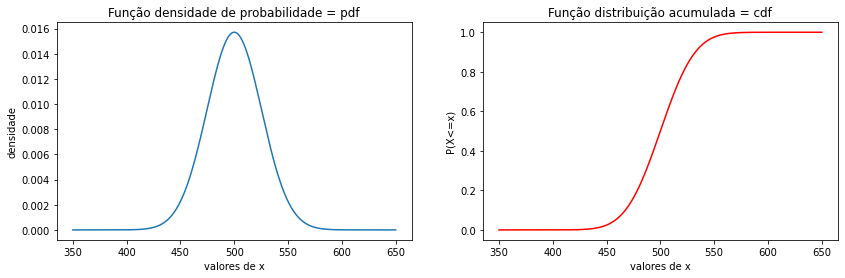

In [2]:
# ESCREVA SEU CÓDIGO AQUI
x = np.linspace(350, 650, 1000) #muitos pontos para ter uma fx bem alizada

mu = 500
sigma = sqrt(645)
fx = stats.norm.pdf(x, loc=mu, scale=sigma) # Calcula o formato da função fx
cdf = stats.norm.cdf(x, loc=mu, scale=sigma) # P(X <= x)

plt.figure(figsize=(14, 4))
plt.subplot(121)

plt.plot(x, fx)
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('Função densidade de probabilidade = pdf')

plt.subplot(122)
plt.plot(x, cdf, color="red")
plt.ylabel('P(X<=x)')
plt.xlabel('valores de x')
plt.title('Função distribuição acumulada = cdf')

plt.show()

<div id="ex2"></div>

### EXERCÍCIO 2

Foi desenvolvido um sensor que acende uma luz no painel do automóvel para avisar o motorista que a concentração do poluente no tanque de combustível está crítica, ou seja, ultrapassa 550 $\mu g/L$. Responda:

1. Sabendo que a luz acendeu, qual é a probabilidade da concentração do poluente ser superior a 580 $\mu g/L$?
2. Sabendo que a luz acendeu, qual é a probabilidade da concentração do poluente ser inferior a 560 $\mu g/L$?

*Resposta esperada: (1) 0.03333307956104959 (2) 0.6294099002523195*

In [3]:
# ESCREVA SEU CÓDIGO AQUI
# P(X > 580 dado luz acendeu) --> P(X > 580 dado X > 550)
# P(A dado B) = P(A n B)/P(B)
#P(X > 580 n X > 550) / P(X > 550) ---> estudou o varal
#P(X > 580) / P(X > 550)

x = 580
mu = 500
sigma = sqrt(645)
numerador = 1 - stats.norm.cdf(580, loc=mu, scale=sigma)
denominador = 1 - stats.norm.cdf(550, loc=mu, scale=sigma)
prob1 = numerador/denominador
prob1

0.03333307956104959

In [4]:
# P(X < 560 n X > 550) / P(X > 550)
# P(X < 560) - P(X < 550) / P(X > 550)

mu = 500
sigma = sqrt(645)

numerador = stats.norm.cdf(560, loc=mu, scale=sigma) - stats.norm.cdf(550, loc=mu, scale=sigma)
denominador = 1 - stats.norm.cdf(550, loc=mu, scale=sigma)
prob2 = numerador/denominador
prob2

0.6294099002523195

<div id="ex3"></div>

### EXERCÍCIO 3

A partir de qual concentração de poluente a luz do painel deveria acender para que apenas as 10% maiores concentrações fossem consideradas críticas? E para que apenas as 0,1% maiores concentrações fossem consideradas críticas?

*Resposta esperada: 532.547373131662 e 578.4821669580019*

In [5]:
# ESCREVA SEU CÓDIGO AQUI
#stats.norm.ppf(p, loc=mu, scale=sigma)
mu = 500
sigma = 645**0.5
valor_x = stats.norm.ppf((1 - 0.1), loc=mu, scale=sigma) 
valor_x

532.547373131662

In [6]:
mu = 500
sigma = 645**0.5
valor_x = stats.norm.ppf((1 - 0.001), loc=mu, scale=sigma) 
valor_x

578.4821669580019

In [7]:
# Para 5% menores valores de concentração, qual seria o valor de x?
valor_x = stats.norm.ppf(0.05, loc=mu, scale=sigma) 
valor_x

458.22589883801754

<div id="ex4"></div>

### EXERCÍCIO 4

Foi desenvolvida uma nova técnica que inicialmente aumenta a concentração do poluente em 100 $\mu g/L$ e depois reduz a nova concentração em 40%. Qual será a nova média e desvio padrão da concentração do poluente se aplicarmos essa nova técnica? Justifique sua resposta.

**Dica:** utilize as propriedades de esperança e variância.

*Resposta esperada: 360 e 15.238110119040353*

In [8]:
# ESCREVA SEU CÓDIGO AQUI
# Y = (X + 100) * 0.60 
# E((X + 100)*0.6) = E(0.6*X + 60)
media = 0.6 * 500 + 60
media

360.0

In [9]:
# Y = c² * Var(X)
var = (0.60**2) * 645
dp = var**0.5
dp

15.238110119040353

<div id="resultados-empiricos"></div>

## Resultados empíricos

O arquivo `poluentes.csv` contém observações da concentração do poluente em tanques de combustível.

In [10]:
poluentes = pd.read_csv('poluentes.csv', header=None)
poluentes.columns = ['concentracao']
concentracao = poluentes['concentracao']
poluentes.head()

,concentracao
0,505.9817
1,493.6099
2,512.1535
3,484.6500
4,517.8975


<div id="ex5"></div>

### EXERCÍCIO 5

Considerando medidas-resumo, faça uma **análise descritiva** desses valores. Baseado nos dados, estime os valores dos parâmetros do modelo normal (média $\mu$ e desvio padrão $\sigma$).

*Resposta esperada: média=500.572255 desvio padrão=25.358164991137812*

In [11]:
# ESCREVA SEU CÓDIGO AQUI
media = concentracao.mean()
media

500.5722552500003

In [12]:
dp = concentracao.std()
dp

25.358164991137812

<div id="ex6"></div>

### EXERCÍCIO 6

Verifique quais seriam as respostas para o [Exercício 2](#ex2) utilizando os dados. Para isso, considere apenas as concentrações acima de 550 $\mu g/L$. Dentre essas concentrações, calcule a frequência relativa das que são:

1. Superiores a 580 $\mu g/L$.
2. Inferiores a 560 $\mu g/L$.

Discuta como esses valores se comparam às respostas do exercício 2. Por que são encontradas essas diferenças?

*Resposta esperada: (1) 0.14285714285714285 (2) 0.7142857142857143*

In [13]:
#Filtra as concentrações acima de 550, depois faz
concentracao[concentracao > 550] #linhas acendeu a luz

27     562.7955
51     553.5489
172    557.8880
197    558.7400
198    581.3374
258    552.7239
326    554.5877
Name: concentracao, dtype: float64

In [32]:
num = len(concentracao[concentracao > 580]) 
denom = len(concentracao[concentracao > 550])

num/denom

0.14285714285714285

In [34]:
maior_que_550 = concentracao[concentracao > 550]
maior_que_560 = concentracao[concentracao > 560]

num = len(maior_que_550)-len(maior_que_560) 
denom = len(concentracao[concentracao > 550])

num/denom

0.7142857142857143

<div id="comparacao"></div>

## Comparação: resultados empíricos *vs* modelo teórico

<div id="ex7"></div>
    
### EXERCÍCIO 7

> Uma maneira de sabermos se uma escolha de modelo teórico é adequado para descever o comportamento de uma variável mensurada em um problema real é utilizarmos a função `probplot()`. <p> 
Essa função `probplot()` traça uma reta indicando o que seria esperado do ponto de vista teórico utilizando a distribuição teórica *versus* os dados reais encontrados. Quanto mais próximos os pontos estiverem dessa reta, mais provável será que os dados sigam a distribuição escolhida nessa função.
    
> Utilizando essa função `probplot()`, verifique se as variáveis `income_2019` e `happy_2019` seriam bem modelados por uma distribuição normal. Interprete esses gráficos.

Consulte a [documentação da função `probplot()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) e gere o `probplot()` com a distribuição normal. 

Discuta se é razoável assumirmos que os dados vieram de uma distribuição normal. **Dica**: para visualizar o gráfico utilize o argumento `plot=plt` na chamada da função `probplot()`.

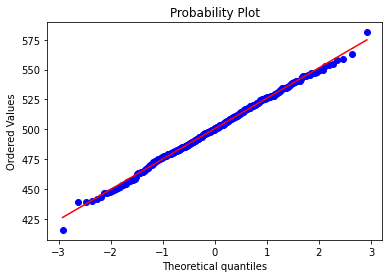

In [15]:
# ESCREVA SEU CÓDIGO AQUI
# Distribuição normal tenta ver todos os possíveis valores
stats.probplot(concentracao, dist='norm', plot=plt); #QQ Plot #Quantil dos conjuntos de dados x quantil da distribuicao normal

In [16]:
concentracao.quantile(0.5) # Quantil com percentual de 50% retorna a mediana

500.7357

In [17]:
stats.norm.ppf(0.5, loc=media, scale=dp) #retorna a mediana a partir do modelo teórico

500.5722552500003

In [18]:
print(concentracao.quantile(0.1)) #Quantil amostra
print(stats.norm.ppf(0.1, loc=media, scale=dp)) #Quantil teórico

467.75768
468.07445920626935


In [19]:
percentual = np.linspace(0, 1, 101)

quantil_amostra = concentracao.quantile(percentual)
quantil_teorico = stats.norm.ppf(percentual, loc=media, scale=dp)

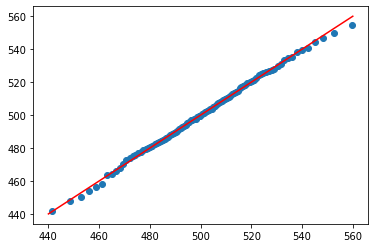

In [20]:
plt.scatter(quantil_teorico, quantil_amostra);
plt.plot([440, 560], [440, 560], color='red') #Bissetriz
plt.show()

<div id="ex8"></div>
    
### EXERCÍCIO 8

Construa um histograma para visualizar os dados de concentração de poluentes divididos em 21 faixas. **Dica**: consulte a documentação da função aqui: [https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html). Além disso, há um exemplo de histograma na atividade da aula 15 (distribuição exponencial).

Plote também a função de densidade de probabilidade (f.d.p.) da distribuição normal utilizando os novos parâmetros calculados a partir dos dados.

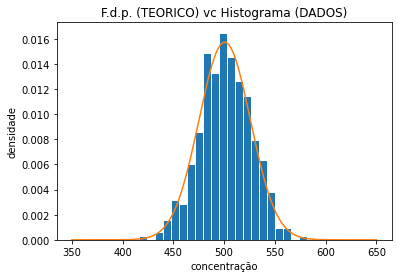

In [21]:
# ESCREVA SEU CÓDIGO AQUI
x = np.linspace(350, 650, 1000) #muitos pontos para ter uma fx bem alizada (terceiro argumento é a quantidede de pontos)
media = concentracao.mean() #mu
dp = concentracao.std() #sigma
fx = stats.norm.pdf(x, loc=media, scale=dp) # Calcula o formato da função fx

#concentracao contém a variável quantitativa
plt.hist(concentracao, bins=21 ,density=True, edgecolor='white'); #histograma
plt.plot(x, fx) #função 
plt.title('F.d.p. (TEORICO) vc Histograma (DADOS)')
plt.xlabel('concentração')
plt.ylabel('densidade')
plt.show()

<div id="ex9"></div>

### EXERCÍCIO 9

Vamos simular a aplicação da técnica introduzida no [Exercício 4](#ex4). Crie uma nova coluna em `poluentes` chamada `'nova concentracao'`. Essa coluna deve ser o resultado da aplicação da técnica do exercício 4 em cada valor da coluna `'concentracao'`, ou seja, para cada valor de concentração, adicionar 100 e aplicar a redução de 40%.

In [22]:
# ESCREVA SEU CÓDIGO AQUI


<div id="ex10"></div>

### EXERCÍCIO 10

Calcule a média e o desvio padrão dessa nova coluna `'nova concentracao'`. Discuta como ela se compara com relação aos valores teóricos obtidos no [exercício 4](#ex4).

*Resposta esperada: Média: 360.3433531500001 DP: 15.21489899468268*

In [23]:
# ESCREVA SEU CÓDIGO AQUI

___

<div id="z"></div>

# Normal Padrão: Leitura Complementar

Seja $X$ uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, 

$\qquad\qquad X\sim N(\mu, \sigma^2)$.

Então a variável aleatória definida por

$\qquad\qquad Z=\frac{(X−\mu)}{\sigma}$

terá média zero e variância 1. 

Ainda, prova-se que

$\qquad\qquad Z=\frac{(X−\mu)}{\sigma} \sim N(0;1)$,

pois toda combinação linear de uma v.a. com distribuição normal também é uma normal.

<div id="ex11"></div>

### EXERCÍCIO 11

Se $X\sim N(500, 645)$, então **UTILIZANDO A DISTRIBUIÇÃO NORMAL PADRÃO**, calcule:
* P(X < 480)
* P(X > 509)
* Valor de x tal que P(X < x) seja igual a 5%.

In [24]:
# ESCREVA SEU CÓDIGO AQUI

<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

- [`.pdf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.cdf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.ppf`](#ppf): ESCREVA AQUI O RESUMO
- [`.mean`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.var`](#pmf-stats): ESCREVA AQUI O RESUMO
